In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

from astropy import units as u
from astropy import constants as c
from astropy.modeling import models

import warnings
warnings.filterwarnings("ignore")

In [4]:
def Planck(wn, T):
    '''
    Inputs:
        wn - wavenumbers in microns
        T - temperature in Kelvin
    Outputs:
        values of the Planck function in erg / s / cm^2 / sr / Hz^-1
    '''
    wn = wn * (1/u.micron)
    nu = wn.to(u.Hz, equivalencies=u.spectral())
    T *= u.K
    B_nu = 2 * c.h * nu ** 3 / c.c ** 2 * (np.exp(c.h * c.c * wn / (c.k_B * T)) - 1) ** -1
    B_nu = B_nu.to(u.erg / u.s / u.cm ** 2 / u.Hz)
    return B_nu.value

def astropyPlanck(wn, T):
    return models.BlackBody(T * u.K)(wn * 1/u.micron)

In [5]:
## Plotting things
temps = [3000, 7000, 10000]
colors = ['orangered', 'gold', 'dodgerblue']

## Plot:

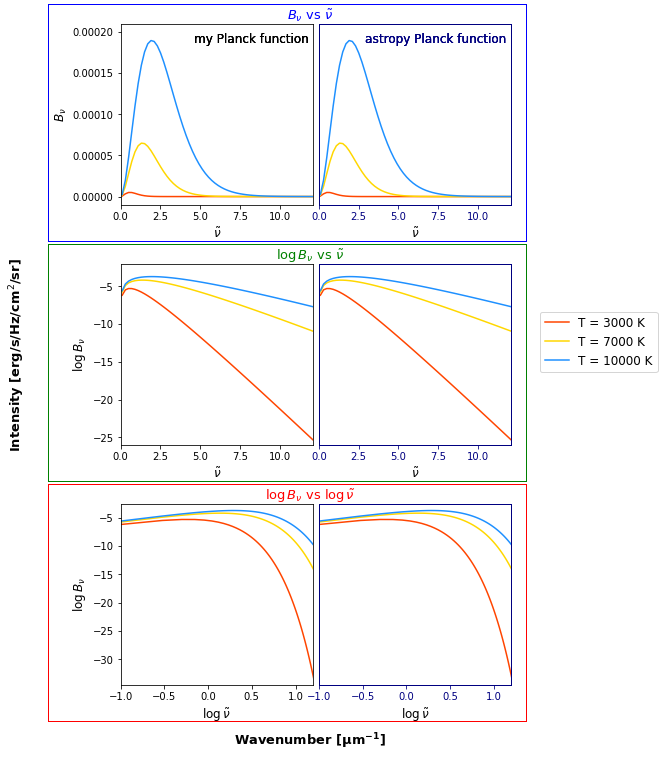

In [6]:
fig = plt.figure(figsize=(7, 10))

fig.supylabel(r'Intensity [erg/s/Hz/cm$^2$/sr]', x=-0.1, size = 13, weight='bold')
fig.supxlabel(r'Wavenumber [$\mathbf{\mu}$m$\mathbf{^{-1}}$]', y = -0.05, size = 13, weight = 'bold')

subfigs = fig.subfigures(3, 1, wspace=0.5, linewidth = 1)
subfigs[0].suptitle(r'$B_\nu$ vs $\tilde{\nu}$', y=0.95, color = 'b', size = 13)
subfigs[1].suptitle(r'$\log B_\nu$ vs $\tilde{\nu}$', y=0.95, color = 'g', size = 13)
subfigs[2].suptitle(r'$\log B_\nu$ vs $\log \tilde{\nu}$', y=0.95,  color = 'r', size = 13)

subfigs[0].set_edgecolor('b')
subfigs[1].set_edgecolor('g')
subfigs[2].set_edgecolor('r')

for i, subfig in enumerate(subfigs):
    bg = subfig.get_children()[0]
    bg.set_xy((-0.02, -0.025))
    bg.set_width(0.95)
    bg.set_height(0.985)

for i in range(3):
    ax1, ax2 = subfigs[i].subplots(1, 2, gridspec_kw = {'wspace': 0.03, 'hspace' : 0})
    for j, T in enumerate(temps):
        wv = np.linspace(0.1, 20, 100)
        planck = Planck(wv, T)
        astropy_planck = astropyPlanck(wv, T).value
        
        if i >= 1:
            planck = np.log10(planck)
            astropy_planck = np.log10(astropy_planck)
            ylabel = r'$\log B_\nu$'
        else:
            ylabel = r'$B_\nu$'
            
        xlabel = r'$\tilde{\nu}$'
        xlim = [0, 12.1]
        if i == 0: 
            ylim = [-0.00001, 0.00021]
        elif i == 1:
            ylim = [-26, -2]
        else:
            wv = np.log10(wv)
            xlabel = r'$\log \tilde{\nu}$'
            xlim = [-1, 1.2]
            ylim = [-34.5, -2.5]

        ax1.plot(wv, planck, color = colors[j], label = 'T = {} K'.format(T))
        ax1.set_xlim(xlim)
        ax1.set_ylim(ylim)
        ax1.set_xlabel(xlabel, size = 12)
        ax1.set_ylabel(ylabel, size = 12)
        
        ax2.plot(wv, astropy_planck, color = colors[j], label = 'T = {} K'.format(T))
        ax2.set_yticks(())
        ax2.set_xlim(xlim)
        ax2.set_ylim(ylim)
        ax2.set_xlabel(xlabel, size = 12)
        for label, spine in ax2.spines.items():
            spine.set_color('navy')
            spine.set_linewidth(1)
        ax2.tick_params(color = 'navy', labelcolor = 'navy')
        
        if i == 0:
            ax1.set_yticks(np.linspace(0, 2, 5) * 10 ** -4)
        if i == 1:
            ax2.legend(loc = (1.15, 0.4), fontsize = 12)
            
    subfigs[0].text(0.27, 0.8, 'my Planck function', size = 12)
    subfigs[0].text(0.61, 0.8, 'astropy Planck function', size = 12, color ='navy')
plt.savefig('hw1.png', bbox_inches = 'tight')